## Preprocessing

In [2]:
# Import the required modules
import pandas as pd
pd.set_option('display.max_columns', None)
import numpy as np

# visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Machine Learning
from sklearn.model_selection import train_test_split, cross_val_score, StratifiedKFold

# Metrics
from sklearn.metrics import confusion_matrix, classification_report, roc_auc_score, roc_curve, RocCurveDisplay

# Pre-Processing
from sklearn.preprocessing import StandardScaler, OneHotEncoder, OrdinalEncoder
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer

# Models
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier

# Deep Learning!
import tensorflow as tf

# suppress warnings
import warnings
warnings.filterwarnings('ignore')

In [3]:
# Import pandas and read the charity_data.csv from the provided cloud URL.
df = pd.read_csv("https://static.bc-edx.com/data/dl-1-2/m21/lms/starter/charity_data.csv")
df.head()

,EIN,NAME,APPLICATION_TYPE,AFFILIATION,CLASSIFICATION,USE_CASE,ORGANIZATION,STATUS,INCOME_AMT,SPECIAL_CONSIDERATIONS,ASK_AMT,IS_SUCCESSFUL
0,10520599,BLUE KNIGHTS MOTORCYCLE CLUB,T10,Independent,C1000,ProductDev,Association,1,0,N,5000,1
1,10531628,AMERICAN CHESAPEAKE CLUB CHARITABLE TR,T3,Independent,C2000,Preservation,Co-operative,1,1-9999,N,108590,1
2,10547893,ST CLOUD PROFESSIONAL FIREFIGHTERS,T5,CompanySponsored,C3000,ProductDev,Association,1,0,N,5000,0
3,10553066,SOUTHSIDE ATHLETIC ASSOCIATION,T3,CompanySponsored,C2000,Preservation,Trust,1,10000-24999,N,6692,1
4,10556103,GENETIC RESEARCH INSTITUTE OF THE DESERT,T3,Independent,C1000,Heathcare,Trust,1,100000-499999,N,142590,1


In [4]:
# Drop the non-beneficial ID columns, 'EIN' and 'NAME'.
df = df.drop(columns=["EIN"])

In [5]:
# Determine the number of unique values in each column.
for col in df.columns:
    if df[col].dtype == 'object':  # Check if column is string-based
        print(col)
        print(df[col].nunique())

NAME
19568
APPLICATION_TYPE
17
AFFILIATION
6
CLASSIFICATION
71
USE_CASE
5
ORGANIZATION
4
INCOME_AMT
9
SPECIAL_CONSIDERATIONS
2


In [6]:
# Choose a cutoff value and create a list of classifications to be replaced
# use the variable name `classifications_to_replace`
cutoff = 100

temp = df.NAME.value_counts()
names_to_replace = list(temp.loc[temp < cutoff].index)

# Replace in dataframe
for nms in names_to_replace:
    df['NAME'] = df['NAME'].replace(nms, "Other")

# Check to make sure replacement was successful
df['NAME'].value_counts()

,count
NAME,
Other,25987
PARENT BOOSTER USA INC,1260
TOPS CLUB INC,765
UNITED STATES BOWLING CONGRESS INC,700
WASHINGTON STATE UNIVERSITY,492
AMATEUR ATHLETIC UNION OF THE UNITED STATES INC,408
PTA TEXAS CONGRESS,368
SOROPTIMIST INTERNATIONAL OF THE AMERICAS INC,331
ALPHA PHI SIGMA,313


In [7]:
# Look at APPLICATION_TYPE value counts to identify and replace with "Other"
df.APPLICATION_TYPE.value_counts()

,count
APPLICATION_TYPE,
T3,27037
T4,1542
T6,1216
T5,1173
T19,1065
T8,737
T7,725
T10,528
T9,156


In [8]:
# Choose a cutoff value and create a list of application types to be replaced
# use the variable name `application_types_to_replace`
cutoff = 500

temp = df.APPLICATION_TYPE.value_counts()
application_types_to_replace = list(temp.loc[temp < cutoff].index)

# Replace in dataframe
for app in application_types_to_replace:
    df['APPLICATION_TYPE'] = df['APPLICATION_TYPE'].replace(app, "Other")

# Check to make sure replacement was successful
df['APPLICATION_TYPE'].value_counts()

,count
APPLICATION_TYPE,
T3,27037
T4,1542
T6,1216
T5,1173
T19,1065
T8,737
T7,725
T10,528
Other,276


In [9]:
# Look at CLASSIFICATION value counts to identify and replace with "Other"
df.CLASSIFICATION.value_counts()

,count
CLASSIFICATION,
C1000,17326
C2000,6074
C1200,4837
C3000,1918
C2100,1883
...,...
C1248,1
C6100,1
C1820,1


In [10]:
# You may find it helpful to look at CLASSIFICATION value counts >1
temp = df.CLASSIFICATION.value_counts()
temp.loc[temp > 1]

,count
CLASSIFICATION,
C1000,17326
C2000,6074
C1200,4837
C3000,1918
C2100,1883
C7000,777
C1700,287
C4000,194
C5000,116


In [11]:
# Choose a cutoff value and create a list of classifications to be replaced
# use the variable name `classifications_to_replace`
cutoff = 100

temp = df.CLASSIFICATION.value_counts()
classifications_to_replace = list(temp.loc[temp < cutoff].index)

# Replace in dataframe
for cls in classifications_to_replace:
    df['CLASSIFICATION'] = df['CLASSIFICATION'].replace(cls, "Other")

# Check to make sure replacement was successful
df['CLASSIFICATION'].value_counts()

,count
CLASSIFICATION,
C1000,17326
C2000,6074
C1200,4837
C3000,1918
C2100,1883
C7000,777
Other,669
C1700,287
C4000,194


In [12]:
# Label (Ordinal Encode) SPECIAL_CONSIDERATIONS
df["SPECIAL_CONSIDERATIONS"] = df["SPECIAL_CONSIDERATIONS"].map({"N": 0, "Y": 1})

In [13]:
# One Hot Encode
df_encoded = pd.get_dummies(df, dtype=int)
df_encoded.head()

,STATUS,SPECIAL_CONSIDERATIONS,ASK_AMT,IS_SUCCESSFUL,NAME_ALPHA PHI SIGMA,NAME_AMATEUR ATHLETIC UNION OF THE UNITED STATES INC,NAME_AMERICAN ASSOCIATION OF UNIVERSITY WOMEN,NAME_CIVITAN INTERNATIONAL,NAME_DEMOLAY INTERNATIONAL,NAME_FARMERS EDUCATIONAL AND COOPERATIVE UNION OF AMERICA,NAME_HABITAT FOR HUMANITY INTERNATIONAL INC,NAME_HONOR SOCIETY OF PHI KAPPA PHI,NAME_INTERNATIONAL ASSOCIATION OF LIONS CLUBS,NAME_INTERNATIONAL ASSOCIATION OF SHEET METAL AIR RAIL & TRANSPORTATION,NAME_KNIGHTS OF COLUMBUS,NAME_LITTLE LEAGUE BASEBALL INC,NAME_MOMS CLUB,NAME_MONTANA 4-H FOUNDATION INC,NAME_MOST WORSHIPFUL STRINGER FREE AND ACCEPTED MASONS,NAME_Other,NAME_PARENT BOOSTER USA INC,NAME_PTA TEXAS CONGRESS,NAME_PTA UTAH CONGRESS,NAME_SERTOMA INC,NAME_SIGMA BETA DELTA INC,NAME_SOROPTIMIST INTERNATIONAL OF THE AMERICAS INC,NAME_TENNESSEE ORDER OF THE EASTERN STAR,NAME_THE UNITED STATES PONY CLUBS INC,NAME_TOASTMASTERS INTERNATIONAL,NAME_TOPS CLUB INC,NAME_UNITED STATES BOWLING CONGRESS INC,NAME_UNIVERSITY OF WYOMING,NAME_VETERANS OF FOREIGN WARS OF THE UNITED STATES AUXILIARY,NAME_WASHINGTON STATE GRANGE,NAME_WASHINGTON STATE UNIVERSITY,APPLICATION_TYPE_Other,APPLICATION_TYPE_T10,APPLICATION_TYPE_T19,APPLICATION_TYPE_T3,APPLICATION_TYPE_T4,APPLICATION_TYPE_T5,APPLICATION_TYPE_T6,APPLICATION_TYPE_T7,APPLICATION_TYPE_T8,AFFILIATION_CompanySponsored,AFFILIATION_Family/Parent,AFFILIATION_Independent,AFFILIATION_National,AFFILIATION_Other,AFFILIATION_Regional,CLASSIFICATION_C1000,CLASSIFICATION_C1200,CLASSIFICATION_C1270,CLASSIFICATION_C1700,CLASSIFICATION_C2000,CLASSIFICATION_C2100,CLASSIFICATION_C2700,CLASSIFICATION_C3000,CLASSIFICATION_C4000,CLASSIFICATION_C5000,CLASSIFICATION_C7000,CLASSIFICATION_Other,USE_CASE_CommunityServ,USE_CASE_Heathcare,USE_CASE_Other,USE_CASE_Preservation,USE_CASE_ProductDev,ORGANIZATION_Association,ORGANIZATION_Co-operative,ORGANIZATION_Corporation,ORGANIZATION_Trust,INCOME_AMT_0,INCOME_AMT_1-9999,INCOME_AMT_10000-24999,INCOME_AMT_100000-499999,INCOME_AMT_10M-50M,INCOME_AMT_1M-5M,INCOME_AMT_25000-99999,INCOME_AMT_50M+,INCOME_AMT_5M-10M
0,1,0,5000,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,1,0,0,0,0,0,0,0,0
1,1,0,108590,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0
2,1,0,5000,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,1,0,0,0,1,0,0,0,0,0,0,0,0
3,1,0,6692,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0
4,1,0,142590,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0


In [14]:
df.IS_SUCCESSFUL.value_counts()

,count
IS_SUCCESSFUL,
1,18261
0,16038


In [15]:
# Split our preprocessed data into our features and target arrays
X = df_encoded.drop(['IS_SUCCESSFUL'], axis=1)
y = df_encoded['IS_SUCCESSFUL']

# Split the preprocessed data into a training and testing dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state = 42, stratify=y)

print(X.shape)
print(X_train.shape)
print(X_test.shape)

(34299, 79)
(25724, 79)
(8575, 79)


In [16]:
# Create a StandardScaler instances
scaler = StandardScaler()

# Fit the StandardScaler
X_scaler = scaler.fit(X_train)

# Scale the data
X_train_scaled = X_scaler.transform(X_train)
X_train_scaled = pd.DataFrame(X_train_scaled, columns=X.columns)

X_test_scaled = X_scaler.transform(X_test)
X_test_scaled = pd.DataFrame(X_test_scaled, columns=X.columns)

X_train_scaled.head()

,STATUS,SPECIAL_CONSIDERATIONS,ASK_AMT,NAME_ALPHA PHI SIGMA,NAME_AMATEUR ATHLETIC UNION OF THE UNITED STATES INC,NAME_AMERICAN ASSOCIATION OF UNIVERSITY WOMEN,NAME_CIVITAN INTERNATIONAL,NAME_DEMOLAY INTERNATIONAL,NAME_FARMERS EDUCATIONAL AND COOPERATIVE UNION OF AMERICA,NAME_HABITAT FOR HUMANITY INTERNATIONAL INC,NAME_HONOR SOCIETY OF PHI KAPPA PHI,NAME_INTERNATIONAL ASSOCIATION OF LIONS CLUBS,NAME_INTERNATIONAL ASSOCIATION OF SHEET METAL AIR RAIL & TRANSPORTATION,NAME_KNIGHTS OF COLUMBUS,NAME_LITTLE LEAGUE BASEBALL INC,NAME_MOMS CLUB,NAME_MONTANA 4-H FOUNDATION INC,NAME_MOST WORSHIPFUL STRINGER FREE AND ACCEPTED MASONS,NAME_Other,NAME_PARENT BOOSTER USA INC,NAME_PTA TEXAS CONGRESS,NAME_PTA UTAH CONGRESS,NAME_SERTOMA INC,NAME_SIGMA BETA DELTA INC,NAME_SOROPTIMIST INTERNATIONAL OF THE AMERICAS INC,NAME_TENNESSEE ORDER OF THE EASTERN STAR,NAME_THE UNITED STATES PONY CLUBS INC,NAME_TOASTMASTERS INTERNATIONAL,NAME_TOPS CLUB INC,NAME_UNITED STATES BOWLING CONGRESS INC,NAME_UNIVERSITY OF WYOMING,NAME_VETERANS OF FOREIGN WARS OF THE UNITED STATES AUXILIARY,NAME_WASHINGTON STATE GRANGE,NAME_WASHINGTON STATE UNIVERSITY,APPLICATION_TYPE_Other,APPLICATION_TYPE_T10,APPLICATION_TYPE_T19,APPLICATION_TYPE_T3,APPLICATION_TYPE_T4,APPLICATION_TYPE_T5,APPLICATION_TYPE_T6,APPLICATION_TYPE_T7,APPLICATION_TYPE_T8,AFFILIATION_CompanySponsored,AFFILIATION_Family/Parent,AFFILIATION_Independent,AFFILIATION_National,AFFILIATION_Other,AFFILIATION_Regional,CLASSIFICATION_C1000,CLASSIFICATION_C1200,CLASSIFICATION_C1270,CLASSIFICATION_C1700,CLASSIFICATION_C2000,CLASSIFICATION_C2100,CLASSIFICATION_C2700,CLASSIFICATION_C3000,CLASSIFICATION_C4000,CLASSIFICATION_C5000,CLASSIFICATION_C7000,CLASSIFICATION_Other,USE_CASE_CommunityServ,USE_CASE_Heathcare,USE_CASE_Other,USE_CASE_Preservation,USE_CASE_ProductDev,ORGANIZATION_Association,ORGANIZATION_Co-operative,ORGANIZATION_Corporation,ORGANIZATION_Trust,INCOME_AMT_0,INCOME_AMT_1-9999,INCOME_AMT_10000-24999,INCOME_AMT_100000-499999,INCOME_AMT_10M-50M,INCOME_AMT_1M-5M,INCOME_AMT_25000-99999,INCOME_AMT_50M+,INCOME_AMT_5M-10M
0,0.0108,-0.029257,-0.032437,-0.094146,-0.110083,-0.075811,-0.064629,-0.055149,-0.067012,-0.067595,-0.058254,-0.085342,-0.077859,-0.067304,-0.09245,-0.078863,-0.058589,-0.092877,0.565558,-0.194535,-0.10376,-0.065233,-0.053347,-0.06184,-0.097249,-0.065533,-0.064629,-0.089187,-0.151208,-0.144761,-0.057917,-0.066719,-0.053712,-0.121957,-0.089408,-0.126316,-0.179158,0.515517,-0.217996,-0.185194,-0.190627,-0.145738,-0.145877,-0.920214,-0.041393,0.926138,-0.03119,-0.012471,-0.018708,0.995423,-0.408517,-0.052236,-0.090506,-0.467020,-0.240452,-0.055854,-0.243154,-0.07607,-0.061523,-0.150128,-0.141508,-0.107338,-0.066128,-0.008818,0.466773,-0.441422,-0.649737,-0.121464,-0.03638,0.674520,-1.574944,-0.145459,-0.12552,-0.329838,-0.082045,-0.170539,2.866491,-0.063405,-0.074504
1,0.0108,-0.029257,-0.032533,-0.094146,-0.110083,-0.075811,-0.064629,-0.055149,-0.067012,-0.067595,-0.058254,-0.085342,-0.077859,-0.067304,-0.09245,-0.078863,-0.058589,-0.092877,0.565558,-0.194535,-0.10376,-0.065233,-0.053347,-0.06184,-0.097249,-0.065533,-0.064629,-0.089187,-0.151208,-0.144761,-0.057917,-0.066719,-0.053712,-0.121957,-0.089408,-0.126316,-0.179158,0.515517,-0.217996,-0.185194,-0.190627,-0.145738,-0.145877,-0.920214,-0.041393,0.926138,-0.03119,-0.012471,-0.018708,-1.004598,-0.408517,-0.052236,-0.090506,2.141235,-0.240452,-0.055854,-0.243154,-0.07607,-0.061523,-0.150128,-0.141508,-0.107338,-0.066128,-0.008818,0.466773,-0.441422,-0.649737,-0.121464,-0.03638,0.674520,-1.574944,-0.145459,7.96688,-0.329838,-0.082045,-0.170539,-0.348859,-0.063405,-0.074504
2,0.0108,-0.029257,-0.032411,-0.094146,-0.110083,-0.075811,-0.064629,-0.055149,-0.067012,-0.067595,-0.058254,-0.085342,-0.077859,-0.067304,-0.09245,-0.078863,-0.058589,-0.092877,0.565558,-0.194535,-0.10376,-0.065233,-0.053347,-0.06184,-0.097249,-0.065533,-0.064629,-0.089187,-0.151208,-0.144761,-0.057917,-0.066719,-0.053712,-0.121957,-0.089408,-0.126316,-0.179158,0.515517,-0.217

## Compile, Train and Evaluate the Model

In [17]:
from tensorflow.keras.layers import LeakyReLU
activation = LeakyReLU(alpha=0.01)

In [18]:
def doClassification_NN(nn_model, X_train, X_test, y_train, y_test):
    # predict
    train_preds = nn_model.predict(X_train)
    train_preds = tf.greater(train_preds, .5)
    train_proba = nn_model.predict(X_train)

    test_preds = nn_model.predict(X_test)
    test_preds = tf.greater(test_preds, .5)
    test_proba = nn_model.predict(X_test)

    # Generate metrics TRAIN
    train_cf = confusion_matrix(y_train, train_preds)
    train_cr = classification_report(y_train, train_preds)
    train_auc = roc_auc_score(y_train, train_proba)

    train_results = f"""TRAIN METRICS
    Confusion Matrix:
    {train_cf}

    AUC: {train_auc}

    Classification Report:
    {train_cr}
    """

    print(train_results)

    # Generate metrics TEST
    test_cf = confusion_matrix(y_test, test_preds)
    test_cr = classification_report(y_test, test_preds)
    test_auc = roc_auc_score(y_test, test_proba)

    test_results = f"""TEST METRICS
    Confusion Matrix:
    {test_cf}

    AUC: {test_auc}

    Classification Report:
    {test_cr}
    """

    print(test_results)

    # VISUALIZE TEST RESULTS
    # Confusion Matrix
    plt.figure(figsize=(4, 4))
    sns.heatmap(test_cf, annot=True, fmt='d', cmap='Blues', cbar=False,
                xticklabels=['Predicted Negative', 'Predicted Positive'],
                yticklabels=['Actual Negative', 'Actual Positive'])
    plt.title('Confusion Matrix')
    plt.xlabel('Predicted Label')
    plt.ylabel('True Label')
    plt.show()

    # ROC Curve
    fpr, tpr, _ = roc_curve(y_test.values, test_proba)

    # Set figure size
    plt.figure(figsize=(6, 6))

    # Plot the ROC curve
    plt.plot(fpr, tpr, color='blue', lw=2, label=f'ROC curve (area = {test_auc:.2f})')

    # Plot the diagonal reference line
    plt.plot([0, 1], [0, 1], color='gray', linestyle='--')

    # Titles and labels
    plt.title('Receiver Operating Characteristic (ROC) Curve')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')

    # Add grid and legend
    plt.grid(linestyle="--", color="lightgrey", alpha=0.75)
    plt.legend(loc="lower right")

    # Display the plot
    plt.show()

In [22]:
 # Create the Keras Sequential model
nn_model1 = tf.keras.models.Sequential()

# Add our first Dense layer, including the input layer
nn_model1.add(tf.keras.layers.Dense(units=5, activation=LeakyReLU(alpha=0.01), input_dim=len(X.columns)))

# Add the output layer that uses a probability activation function
nn_model1.add(tf.keras.layers.Dense(units=1, activation="sigmoid"))

# Check the structure of the Sequential model
nn_model1.summary()


# Compile the model
nn_model1.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

# Train the model
fit_model1 = nn_model1.fit(X_train, y_train, epochs=10)

# Evaluate the model using the test data
model_loss, model_accuracy = nn_model1.evaluate(X_test_scaled,y_test,verbose=2)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_4 (Dense)                      │ (None, 5)                   │             400 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 1)                   │               6 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 406 (1.59 KB)

 Trainable params: 406 (1.59 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/10
804/804 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.4986 - loss: 9470.4385
Epoch 2/10
804/804 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.5106 - loss: 4478.6523
Epoch 3/10
804/804 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.5142 - loss: 1713.8154
Epoch 4/10
804/804 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.5488 - loss: 3818.8796
Epoch 5/10
804/804 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.5361 - loss: 4392.3726
Epoch 6/10
804/804 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.5758 - loss: 2288.2131
Epoch 7/10
804/804 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.5286 - loss: 4202.5459
Epoch 8/10
804/804 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.6205 - loss: 841.9420
Epoch 9/10
804/804 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.5427 - loss: 13329.5947
Epoch 10/10
804/804 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.6048 - loss: 4782.1875
268/268 - 1s - 3ms/step - accuracy: 0.7179 - loss: 6.0754
Loss: 6.075437545776367, Accuracy: 0.71790087223052

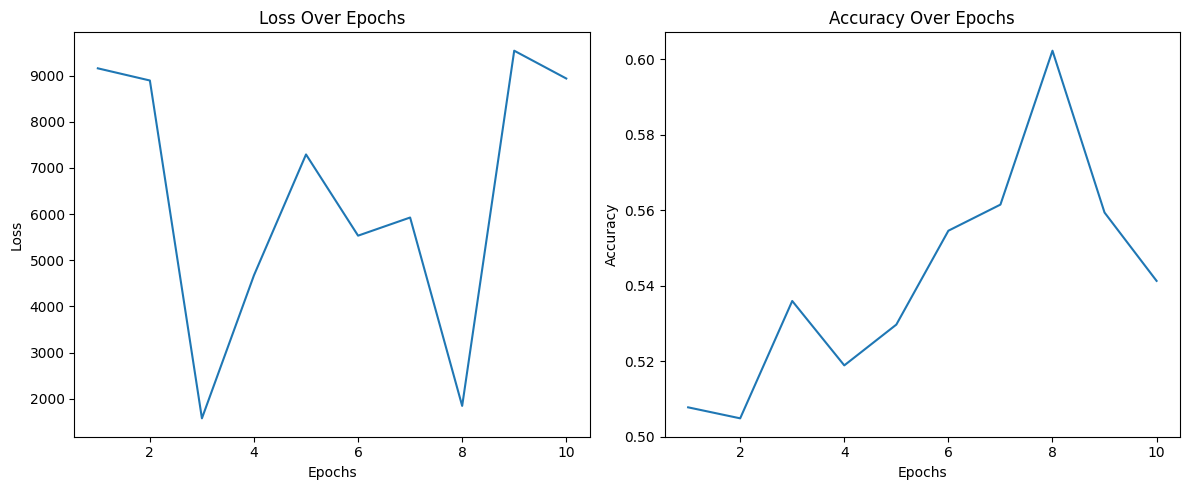

In [23]:
# Create a DataFrame containing training history
history_df = pd.DataFrame(fit_model1.history)

# Increase the index by 1 to match the number of epochs
history_df.index += 1

# Create subplots: 1 row, 2 columns
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# Plot the loss
history_df.plot(y="loss", ax=axes[0], title="Loss Over Epochs", legend=False)
axes[0].set_xlabel("Epochs")
axes[0].set_ylabel("Loss")

# Plot the accuracy
history_df.plot(y="accuracy", ax=axes[1], title="Accuracy Over Epochs", legend=False)
axes[1].set_xlabel("Epochs")
axes[1].set_ylabel("Accuracy")

plt.tight_layout()  # Adjust layout to prevent overlap
plt.show()

804/804 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
804/804 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
268/268 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
268/268 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
TRAIN METRICS
    Confusion Matrix:
    [[10914  1114]
 [ 9654  4042]]

    AUC: 0.6658606614259097

    Classification Report:
                  precision    recall  f1-score   support

           0       0.53      0.91      0.67     12028
           1       0.78      0.30      0.43     13696

    accuracy                           0.58     25724
   macro avg       0.66      0.60      0.55     25724
weighted avg       0.67      0.58      0.54     25724

    
TEST METRICS
    Confusion Matrix:
    [[3615  395]
 [3161 1404]]

    AUC: 0.6668455367605083

    Classification Report:
                  precision    recall  f1-score   support

           0       0.53      0.90      0.67      4010
           1       0.78      0.31      0.44      4565

    accuracy                           0.59      8575
   macro avg       0.66    

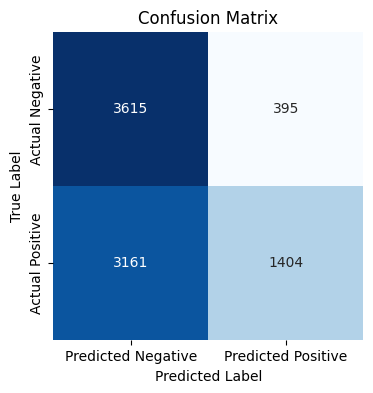

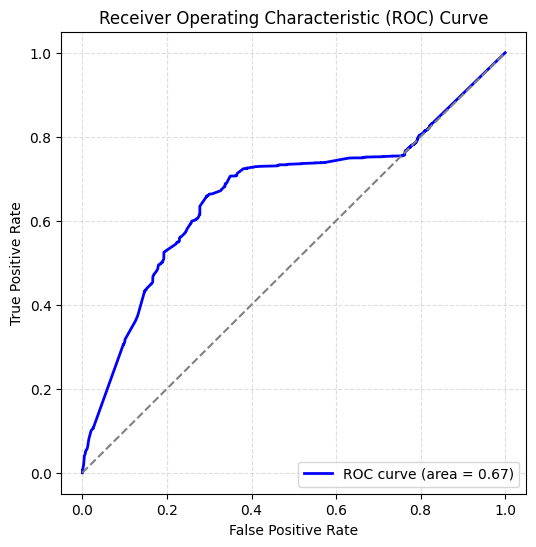

In [24]:
doClassification_NN(nn_model1, X_train, X_test, y_train, y_test)

In [ ]:
# This first optimization of using LeakyReLU and keeping the name column has prevented the model from just saying everyone received funding. Try again?

## Model Optimization 2! - Add another layer in 5 - 3 - 1 ##

In [25]:
 # Create the Keras Sequential model
nn_model2 = tf.keras.models.Sequential()

# Add our first Dense layer, including the input layer
nn_model2.add(tf.keras.layers.Dense(units=5, activation=LeakyReLU(alpha=0.01), input_dim=len(X.columns)))

nn_model2.add(tf.keras.layers.Dense(units=3, activation=LeakyReLU(alpha=0.01)))

# Add the output layer that uses a probability activation function
nn_model2.add(tf.keras.layers.Dense(units=1, activation="sigmoid"))

# Check the structure of the Sequential model
nn_model2.summary()


# Compile the model
nn_model2.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

# Train the model
fit_model2 = nn_model2.fit(X_train, y_train, epochs=10)

# Evaluate the model using the test data
model_loss, model_accuracy = nn_model2.evaluate(X_test_scaled,y_test,verbose=2)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_6 (Dense)                      │ (None, 5)                   │             400 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_7 (Dense)                      │ (None, 3)                   │              18 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_8 (Dense)                      │ (None, 1)                   │               4 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 422 (1.65 KB)

 Trainable params: 422 (1.65 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/10
804/804 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.4670 - loss: 51640.2734
Epoch 2/10
804/804 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.4634 - loss: 7081.7163
Epoch 3/10
804/804 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.4702 - loss: 281.9991
Epoch 4/10
804/804 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.5012 - loss: 148.8547
Epoch 5/10
804/804 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.5215 - loss: 73.2384
Epoch 6/10
804/804 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.5285 - loss: 32.0251
Epoch 7/10
804/804 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.5300 - loss: 6.2641
Epoch 8/10
804/804 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.5114 - loss: 28.4610
Epoch 9/10
804/804 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.5118 - loss: 10.8741
Epoch 10/10
804/804 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.5275 - loss: 5.9209
268/268 - 1s - 2ms/step - accuracy: 0.7045 - loss: 0.5859
Loss: 0.585926353931427, Accuracy: 0.7044897675514221


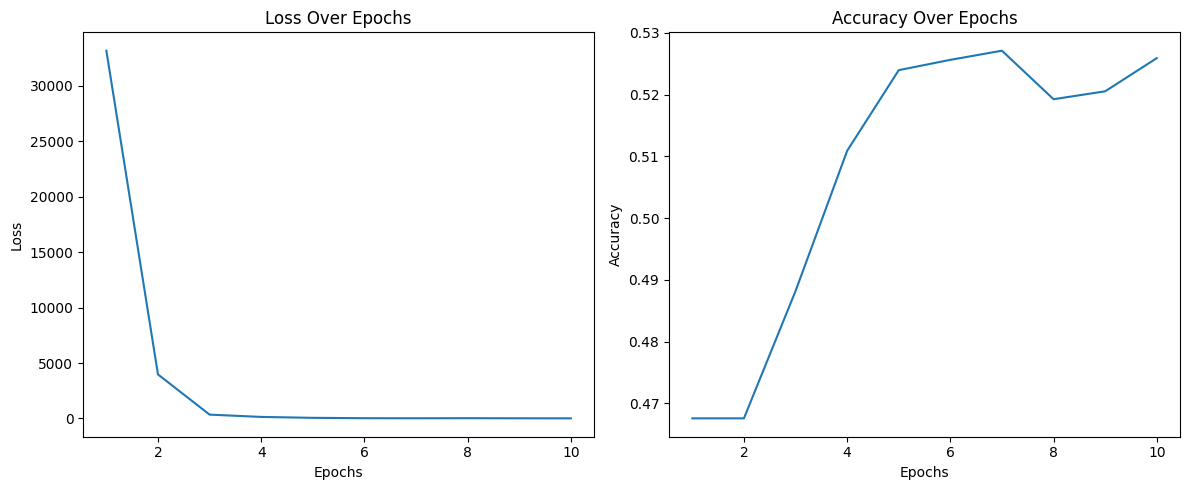

In [26]:
# Create a DataFrame containing training history
history_df = pd.DataFrame(fit_model2.history)

# Increase the index by 1 to match the number of epochs
history_df.index += 1

# Create subplots: 1 row, 2 columns
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# Plot the loss
history_df.plot(y="loss", ax=axes[0], title="Loss Over Epochs", legend=False)
axes[0].set_xlabel("Epochs")
axes[0].set_ylabel("Loss")

# Plot the accuracy
history_df.plot(y="accuracy", ax=axes[1], title="Accuracy Over Epochs", legend=False)
axes[1].set_xlabel("Epochs")
axes[1].set_ylabel("Accuracy")

plt.tight_layout()  # Adjust layout to prevent overlap
plt.show()

804/804 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
804/804 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
268/268 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
268/268 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
TRAIN METRICS
    Confusion Matrix:
    [[  934 11094]
 [  885 12811]]

    AUC: 0.6785837517900212

    Classification Report:
                  precision    recall  f1-score   support

           0       0.51      0.08      0.13     12028
           1       0.54      0.94      0.68     13696

    accuracy                           0.53     25724
   macro avg       0.52      0.51      0.41     25724
weighted avg       0.53      0.53      0.43     25724

    
TEST METRICS
    Confusion Matrix:
    [[ 300 3710]
 [ 266 4299]]

    AUC: 0.6787615299101644

    Classification Report:
                  precision    recall  f1-score   support

           0       0.53      0.07      0.13      4010
           1       0.54      0.94      0.68      4565

    accuracy                           0.54      8575
   macro avg       0.53    

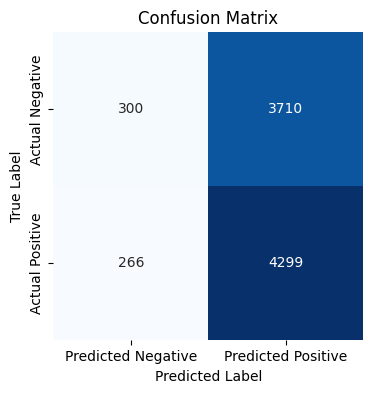

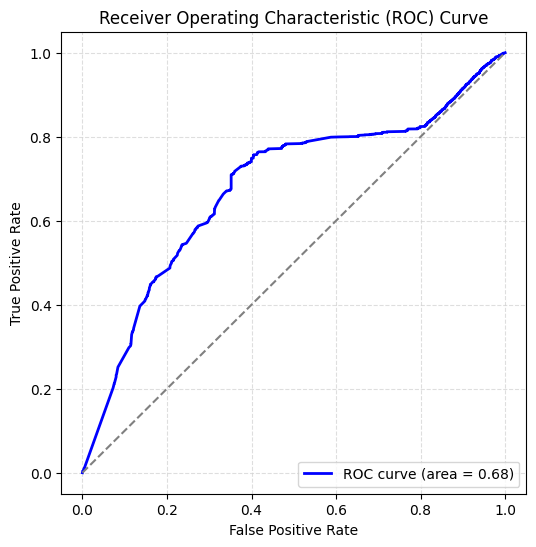

In [27]:
doClassification_NN(nn_model2, X_train, X_test, y_train, y_test)

## Model Optimization 3! -  Go back to 1 layer but train for way more epochs, now 25 ##

In [42]:
 # Create the Keras Sequential model
nn_model3 = tf.keras.models.Sequential()

# Add our first Dense layer, including the input layer
nn_model3.add(tf.keras.layers.Dense(units=5, activation=LeakyReLU(alpha=0.01), input_dim=len(X.columns)))

# Add the output layer that uses a probability activation function
nn_model3.add(tf.keras.layers.Dense(units=1, activation="sigmoid"))

# Check the structure of the Sequential model
nn_model3.summary()


# Compile the model
nn_model3.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

# Train the model
fit_model3 = nn_model3.fit(X_train, y_train, epochs=25)

# Evaluate the model using the test data
model_loss, model_accuracy = nn_model3.evaluate(X_test_scaled,y_test,verbose=2)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

Model: "sequential_9"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_21 (Dense)                     │ (None, 5)                   │             400 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_22 (Dense)                     │ (None, 1)                   │               6 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 406 (1.59 KB)

 Trainable params: 406 (1.59 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/25
804/804 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.4865 - loss: 5884.1113
Epoch 2/25
804/804 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.5475 - loss: 19581.4961
Epoch 3/25
804/804 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.4766 - loss: 12026.6357
Epoch 4/25
804/804 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.5056 - loss: 13526.0713
Epoch 5/25
804/804 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.5604 - loss: 6342.9663
Epoch 6/25
804/804 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.5607 - loss: 1298.1584
Epoch 7/25
804/804 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.5668 - loss: 9981.0498
Epoch 8/25
804/804 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.5650 - loss: 36873.8047
Epoch 9/25
804/804 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.5458 - loss: 6193.9331
Epoch 10/25
804/804 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.5427 - loss: 26123.5488
Epoch 11/25
804/804 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.5510 - loss: 9220.8447
Epoch 12/25
80

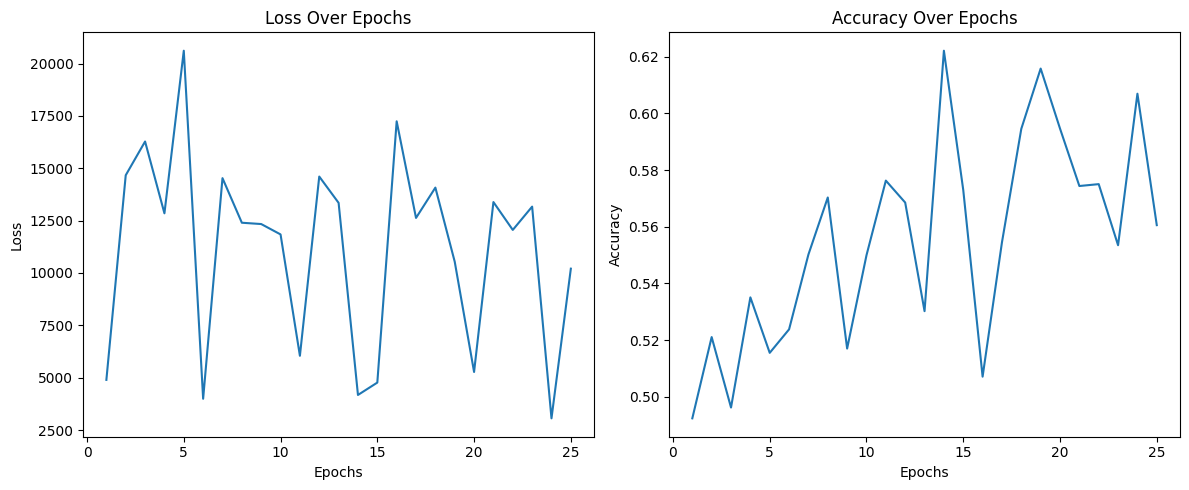

In [43]:
# Create a DataFrame containing training history
history_df = pd.DataFrame(fit_model3.history)

# Increase the index by 1 to match the number of epochs
history_df.index += 1

# Create subplots: 1 row, 2 columns
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# Plot the loss
history_df.plot(y="loss", ax=axes[0], title="Loss Over Epochs", legend=False)
axes[0].set_xlabel("Epochs")
axes[0].set_ylabel("Loss")

# Plot the accuracy
history_df.plot(y="accuracy", ax=axes[1], title="Accuracy Over Epochs", legend=False)
axes[1].set_xlabel("Epochs")
axes[1].set_ylabel("Accuracy")

plt.tight_layout()  # Adjust layout to prevent overlap
plt.show()

804/804 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
804/804 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
268/268 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
268/268 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
TRAIN METRICS
    Confusion Matrix:
    [[9810 2218]
 [6875 6821]]

    AUC: 0.6734507351567138

    Classification Report:
                  precision    recall  f1-score   support

           0       0.59      0.82      0.68     12028
           1       0.75      0.50      0.60     13696

    accuracy                           0.65     25724
   macro avg       0.67      0.66      0.64     25724
weighted avg       0.68      0.65      0.64     25724

    
TEST METRICS
    Confusion Matrix:
    [[3278  732]
 [2287 2278]]

    AUC: 0.6751725287001554

    Classification Report:
                  precision    recall  f1-score   support

           0       0.59      0.82      0.68      4010
           1       0.76      0.50      0.60      4565

    accuracy                           0.65      8575
   macro avg       0.67      0.

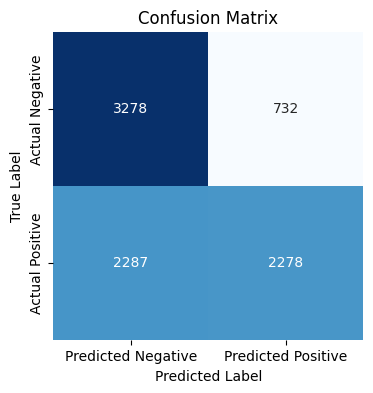

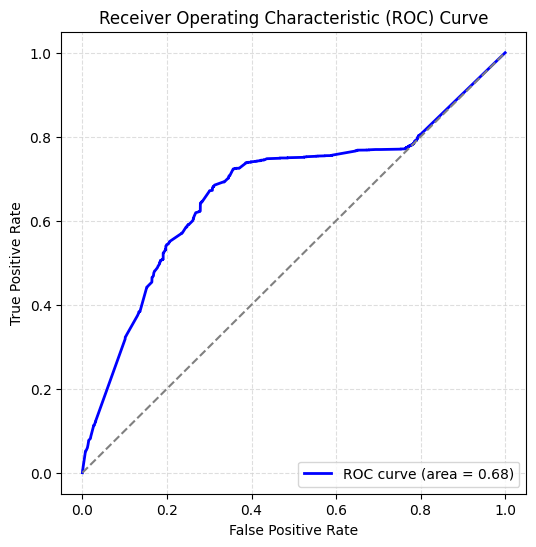

In [44]:
doClassification_NN(nn_model3, X_train, X_test, y_train, y_test)

In [45]:
nn_model3.save('my_model3.keras')